In [13]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from kam11 import ctd, context
from beamforming import curvedWaveFront

In [14]:
# Plot a bent front from a measured sound speed profile
sspID=6
theta0=3  # Angle of ray at bottom receiver

In [15]:
vla1=context.VLA1()
ctd=ctd.CTD()
ssp=ctd.ss[sspID]
rd=vla1.phoneDepths()

In [16]:
def getCatZ(z):
    """return sound speed at depth"""
    return ssp[ssp.index.values>=z].iloc[0]

In [17]:
waveFront=curvedWaveFront.CurvedWaveFront(ssp)
# rayParameters=waveFront.calculateRayParameters(theta0,rd[-1],rd[0])
rayParameters=waveFront.calculateRayParameters(theta0,rd[1])
dt=curvedWaveFront.delayFromProfile(rayParameters, rd, rd[1])

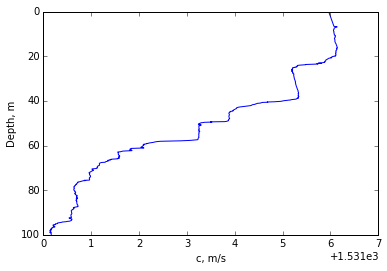

In [18]:
_=plt.plot(ssp, ssp.index)
_=plt.ylim(100,0)
_=plt.ylabel('Depth, m')
_=plt.xlabel('c, m/s')

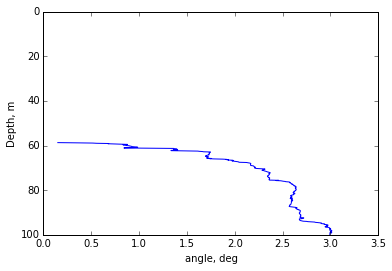

In [19]:
_=plt.plot(rayParameters['theta'], rayParameters.index)
_=plt.ylim(100,0)
_=plt.ylabel('Depth, m')
_=plt.xlabel('angle, deg')

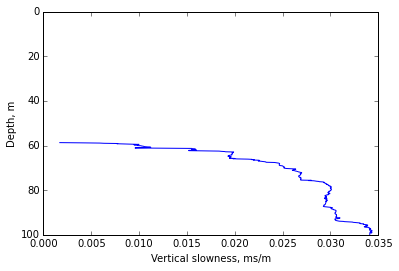

In [20]:
_=plt.plot(1e3*rayParameters['q'], rayParameters.index)

_=plt.ylim(100,0)
_=plt.ylabel('Depth, m')
_=plt.xlabel('Vertical slowness, ms/m')

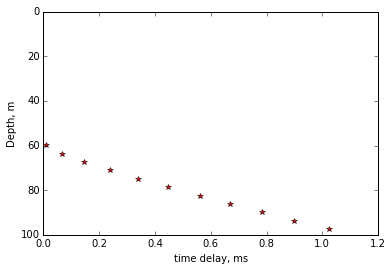

In [21]:
_=plt.plot(1e3*dt,rd,'r*')
_=plt.ylim(100,0)

_=plt.ylabel('Depth, m')
_=plt.xlabel('time delay, ms')